## Capitulo 0 - NAIVE, Medias Moveis e Modelo de Amortecimento Exponencial

In [1]:
library(forecast)
library(ggplot2)
library(dplyr)
library(data.table)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
"pacote 'dplyr' foi compilado no R versão 4.4.2"

Anexando pacote: 'dplyr'


Os seguintes objetos são mascarados por 'package:stats':

    filter, lag


Os seguintes objetos são mascarados por 'package:base':

    intersect, setdiff, setequal, union



Anexando pacote: 'data.table'


Os seguintes objetos são mascarados por 'package:dplyr':

    between, first, last




### Navie

O modelo naive, também conhecido como modelo ingenuo, é o modelo mais simples de previsões para uma série temporal. A previsão dele é igual ao valor da última observação ou, **quando há sazonalidada, a previsão de um mes furuto é igual ao valor da ultima observação do mes**.

> Este modelo é o modelo referencia para previsões pelo fato de não ter praticamente "nenhum custo", ser rapido e facil de prepara, **embora não tenha muita precisão**

* `navie()`
* `snavie`

In [2]:
head(gold, 2)

A Time Series:
[1] 306.25 299.50

>  refere-se aos precos diarios do ouro em dolares americanos no
 perodo de 1o de janeiro de 1985 a 31 de marco de 1989 e a serie temporal wineind refere-se as
 vendas totais australianas de vinho por fabricantes de vinho em garrafas de 1 litro ou menos
 no perodo de jan/1980 a ago/1994

In [3]:
navie_ = naive(gold, h = 12)

In [4]:
summary(navie_)


Forecast method: Naive method

Model Information:
Call: naive(y = gold, h = 12) 

Residual sd: 6.121 

Error measures:
                     ME     RMSE      MAE        MPE      MAPE     MASE
Training set 0.07087605 6.121004 3.120736 0.01118043 0.7835271 1.014732
                  ACF1
Training set -0.303895

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1109          382.3 374.4556 390.1444 370.3031 394.2969
1110          382.3 371.2064 393.3936 365.3338 399.2662
1111          382.3 368.7131 395.8869 361.5207 403.0793
1112          382.3 366.6112 397.9888 358.3061 406.2939
1113          382.3 364.7594 399.8406 355.4740 409.1260
1114          382.3 363.0853 401.5147 352.9136 411.6864
1115          382.3 361.5457 403.0543 350.5591 414.0409
1116          382.3 360.1127 404.4873 348.3675 416.2325
1117          382.3 358.7669 405.8331 346.3092 418.2908
1118          382.3 357.4939 407.1061 344.3623 420.2377
1119          382.3 356.2831 408.3169 342.5106 422.0894
1120  

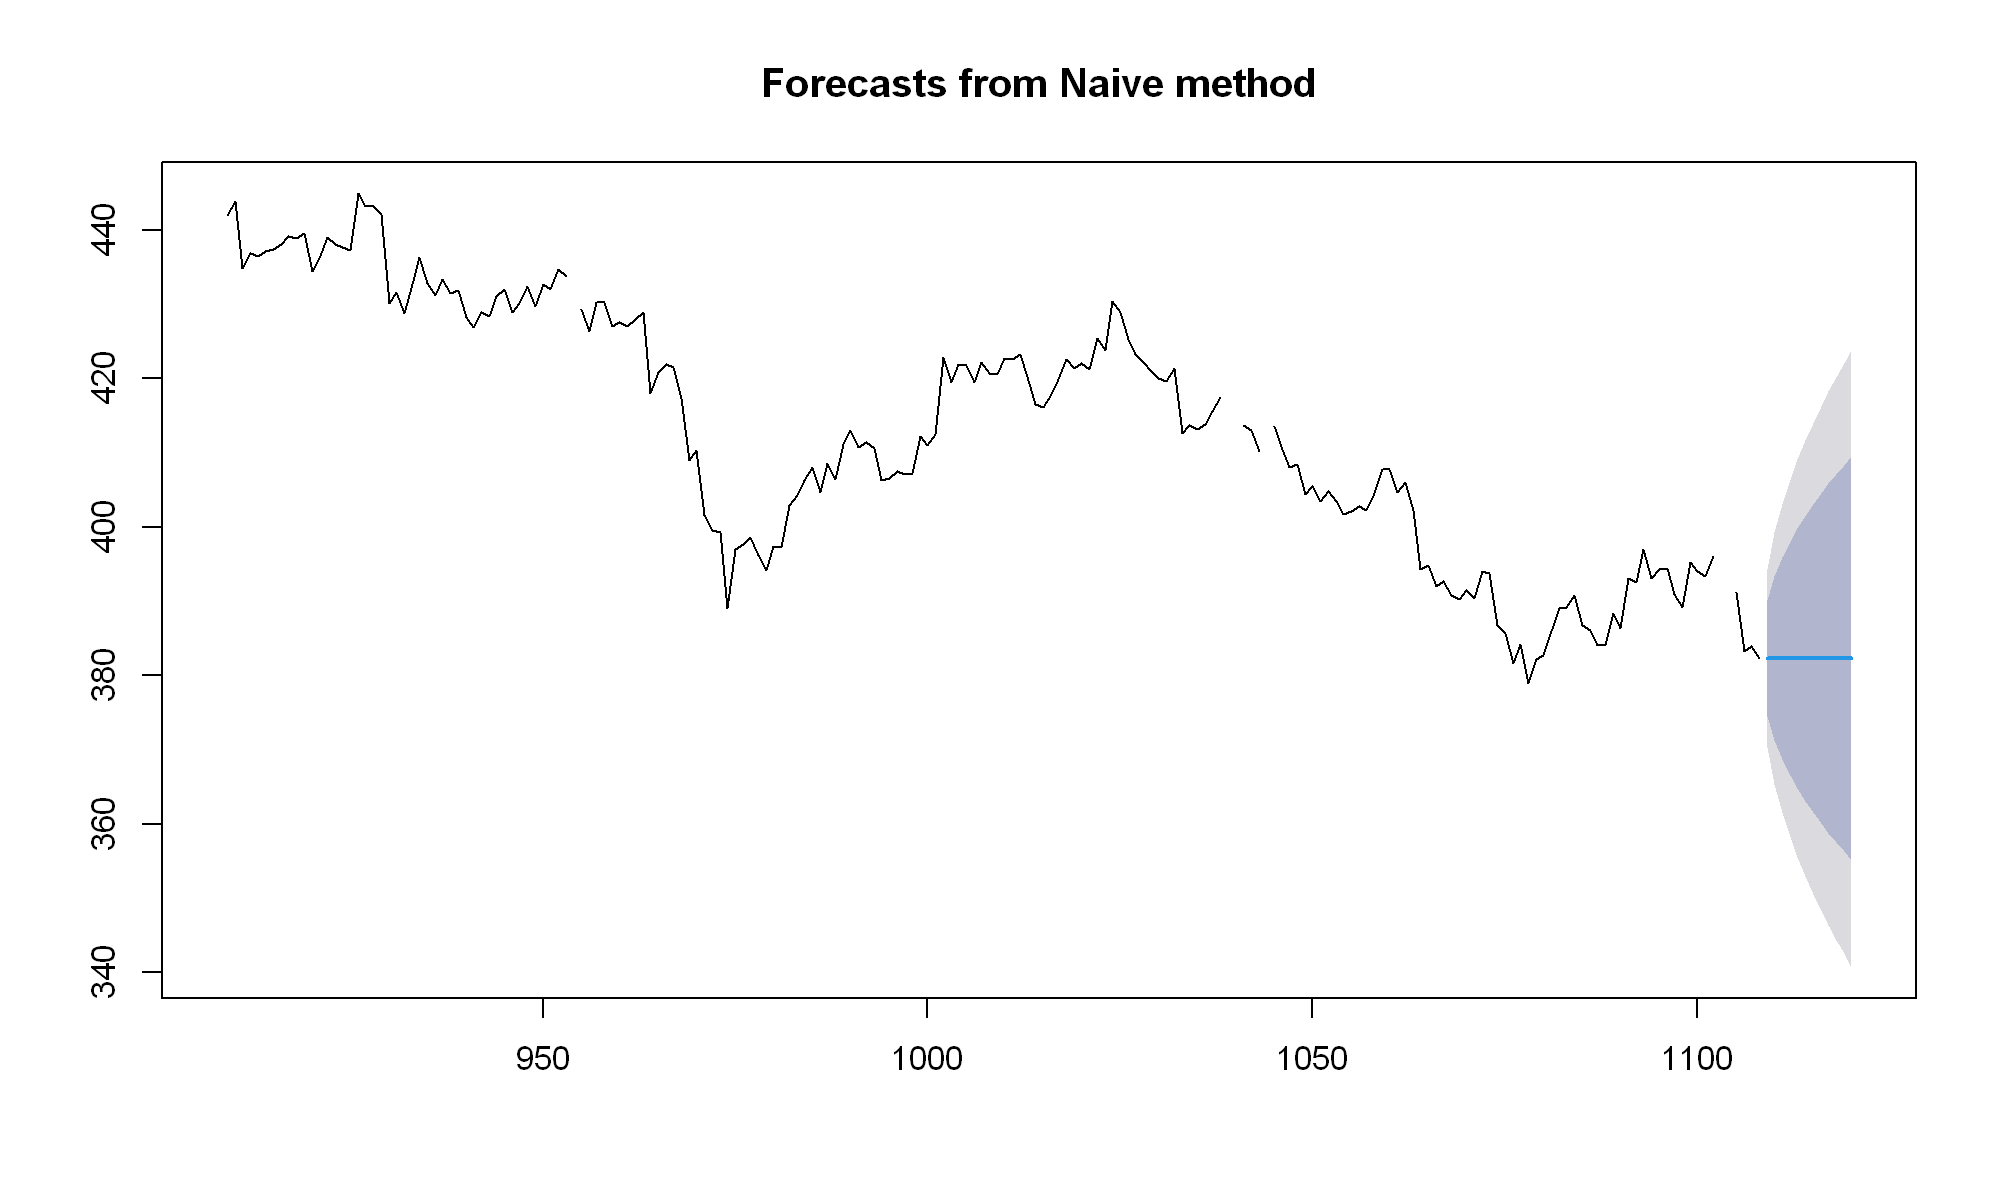

In [5]:
par(bg = 'white')
options(repr.plot.width = 10, repr.plot.height = 6, repr.plot.res = 200)
plot(navie_, include=200)

> previsao para qualquer tempo futuro e igual ao ultimo valor
 observado e o intervalo de con anca vai aumentando com o tempo.

In [6]:
summary(naive(wineind, h = 12))


Forecast method: Naive method

Model Information:
Call: naive(y = wineind, h = 12) 

Residual sd: 6771.2775 

Error measures:
                   ME     RMSE      MAE       MPE     MAPE     MASE       ACF1
Training set 46.97143 6771.277 4833.726 -3.913764 21.32904 2.456938 -0.3002302

Forecasts:
         Point Forecast      Lo 80    Hi 80       Lo 95    Hi 95
Sep 1994          23356 14678.2588 32033.74  10084.5401 36627.46
Oct 1994          23356 11083.8207 35628.18   4587.3214 42124.68
Nov 1994          23356  8325.7113 38386.29    369.1571 46342.84
Dec 1994          23356  6000.5176 40711.48  -3186.9199 49898.92
Jan 1995          23356  3951.9807 42760.02  -6319.8866 53031.89
Feb 1995          23356  2099.9619 44612.04  -9152.3050 55864.30
Mar 1995          23356   396.8548 46315.15 -11756.9825 58468.98
Apr 1995          23356 -1188.3587 47900.36 -14181.3573 60893.36
May 1995          23356 -2677.2237 49389.22 -16458.3798 63170.38
Jun 1995          23356 -4085.4272 50797.43 -18612.04

In [7]:
snaive_ = snaive(wineind, h = 12)
summary(snaive_)


Forecast method: Seasonal naive method

Model Information:
Call: snaive(y = wineind, h = 12) 

Residual sd: 2694.261 

Error measures:
                   ME     RMSE      MAE       MPE     MAPE MASE       ACF1
Training set 355.0122 2694.261 1967.378 0.8684261 7.887751    1 0.08275386

Forecasts:
         Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
Sep 1994          22724 19271.17 26176.83 17443.346 28004.65
Oct 1994          28496 25043.17 31948.83 23215.346 33776.65
Nov 1994          32857 29404.17 36309.83 27576.346 38137.65
Dec 1994          37198 33745.17 40650.83 31917.346 42478.65
Jan 1995          13652 10199.17 17104.83  8371.346 18932.65
Feb 1995          22784 19331.17 26236.83 17503.346 28064.65
Mar 1995          23565 20112.17 27017.83 18284.346 28845.65
Apr 1995          26323 22870.17 29775.83 21042.346 31603.65
May 1995          23779 20326.17 27231.83 18498.346 29059.65
Jun 1995          27549 24096.17 31001.83 22268.346 32829.65
Jul 1995          29660 26207.1

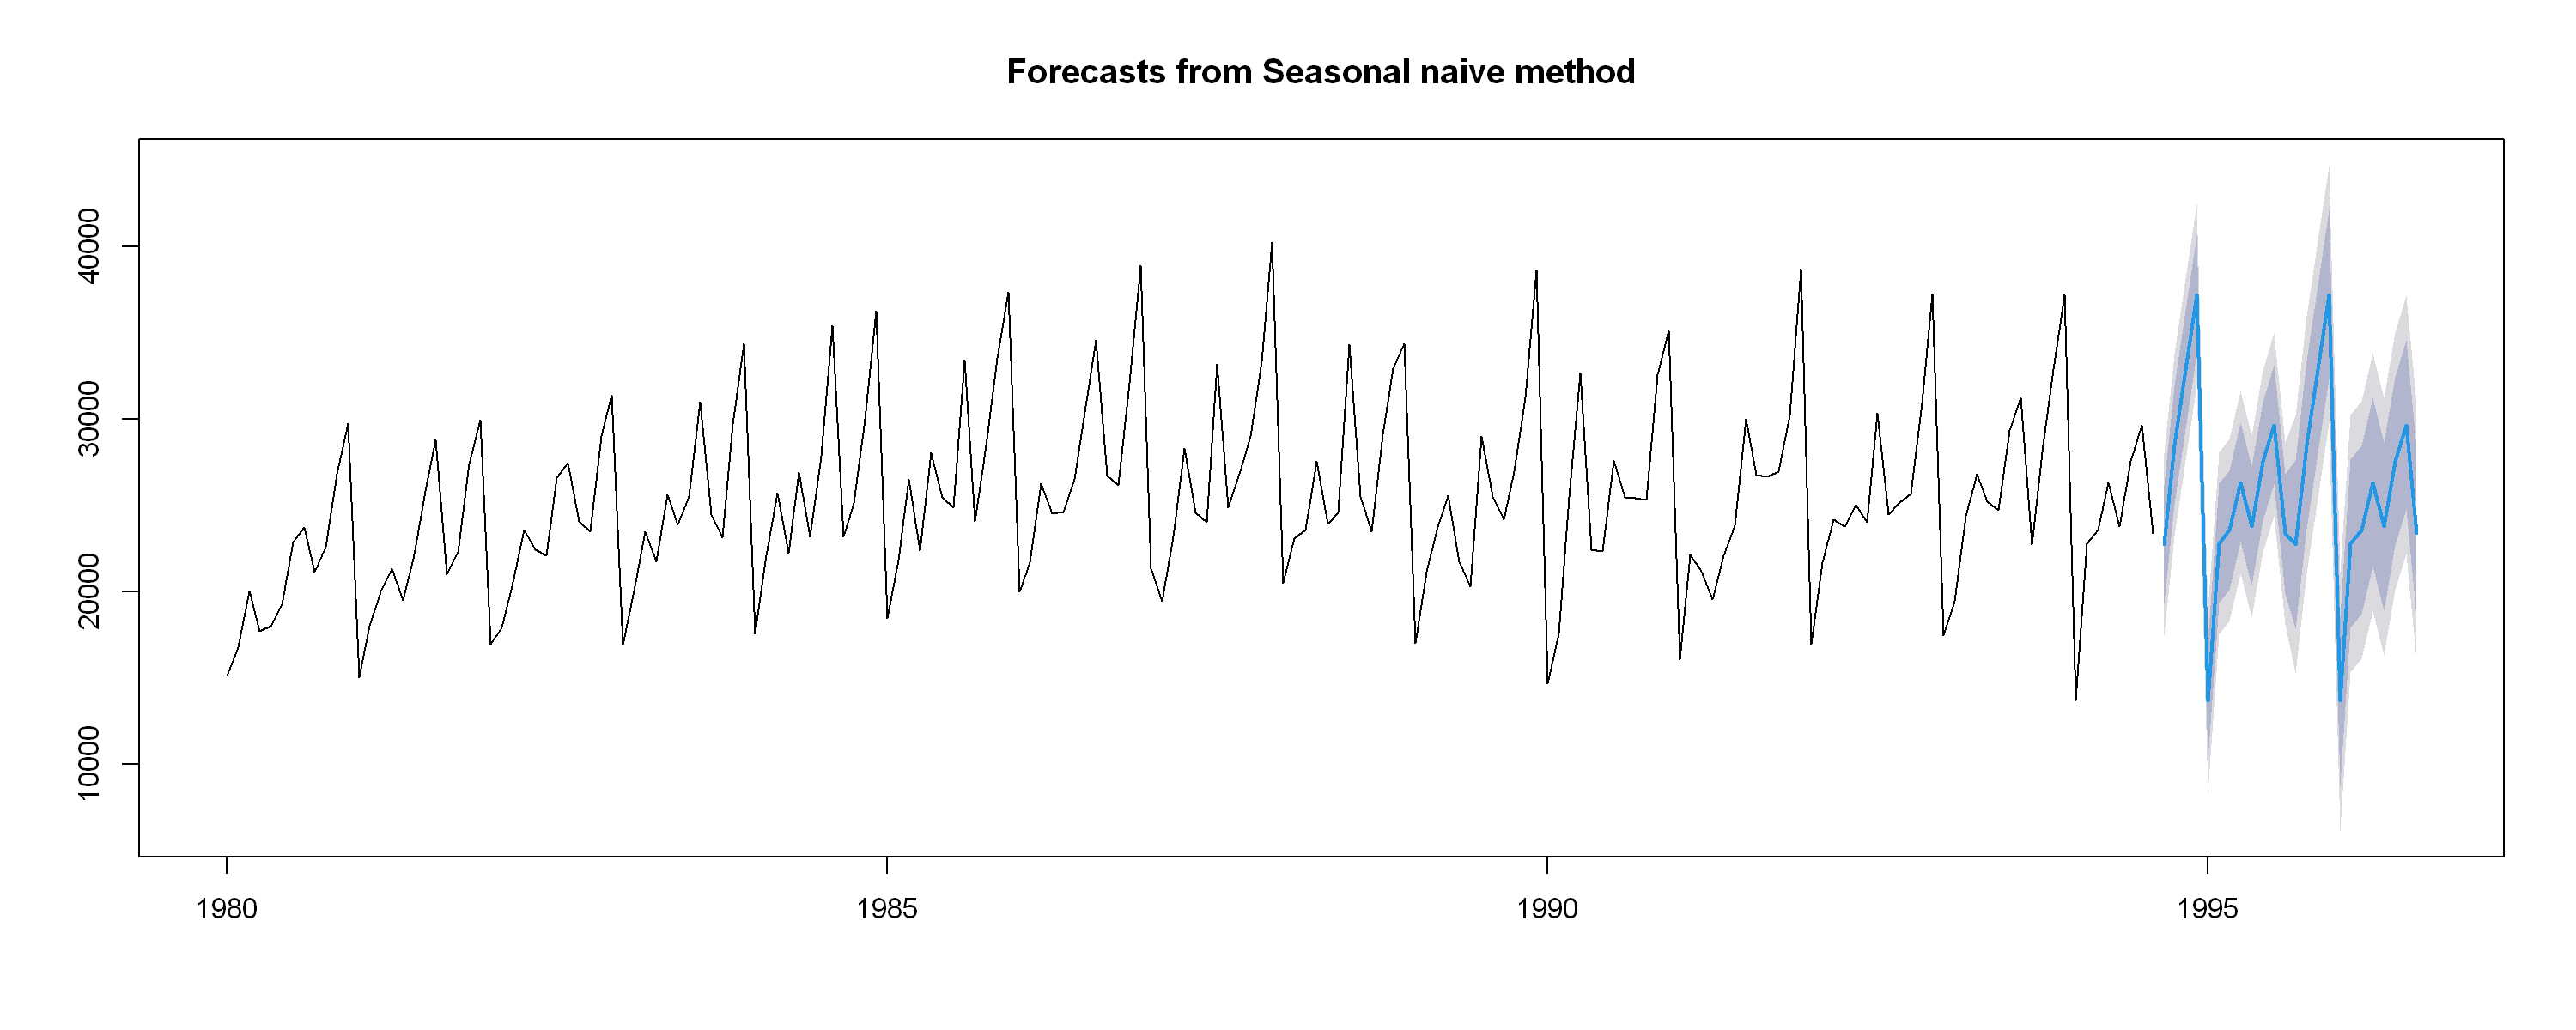

In [8]:
par(bg = 'white')
options(repr.plot.width = 15, repr.plot.height = 6, repr.plot.res = 200)
plot(snaive(wineind))

>  que a previsao para qualquer tempo futuro e igual ao ultimo ano,
 por exemplo, para qualquer janeiro futuro vai ser igual ao ultimo valor de janeiro observado,
 e o intervalo de con anca vai aumentando com os anos. Esse modelo nao e in uenciado
 por qualquer valor mais proximo, mas sim pelo valor do mesmo mes mais proximo. 

&nbsp;

### Modelos de suavização exponencial

* Quando a série não apresenta tendencias e nem sazonalidade, podemos utilizar a suavização exponencial simples(SES).
* Se possuir tendencia mas sem sazonalidade é Suavização de Holt.
* Se Quando apresenta sazonalidade e tendencias utilizamos a Suavização Holt-winters.

#### Suavização exponencial

Dá pesos maiores as observações mais recentes captando melhor as mudanças de comportamento.

$$Z_t = Z_t+(1 - \alpha)\^Z_{t-1} $$

* $Z_t$ : valor observado
* $\^Z_t$ : Valor exponencialmente suavizado
* $\alpha$ : contante de suavização

Segue o exemplo abaixo

In [9]:
suavizacao_simples = function(series, alpha = 0.5){
    suavizacao = series[1]
    for(i in 2:length(series)){
        suavizacao[i] = alpha * series[i] + (1 - alpha) * suavizacao[i-1]
    }
    return(suavizacao)
}

In [10]:
series_criada = c(
    10,12,9,8,10,15,19,8,10,9,12,10,8,15
)

In [11]:
data.frame(
    series = series_criada,
    suavizacao_09 = suavizacao_simples(series_criada, alpha = 0.9),
    suavizacao_05 = suavizacao_simples(series_criada),
    suavizacao_01 = suavizacao_simples(series_criada, alpha = 0.1)
)

series,suavizacao_09,suavizacao_05,suavizacao_01
<dbl>,<dbl>,<dbl>,<dbl>
10,10.000000,10.000000,10.00000
12,11.800000,11.000000,10.20000
9,9.280000,10.000000,10.08000
8,8.128000,9.000000,9.87200
10,9.812800,9.500000,9.88480
15,14.481280,12.250000,10.39632
19,18.548128,15.625000,11.25669
8,9.054813,11.812500,10.93102
10,9.905481,10.906250,10.83792


> **Quanto $\alpha$ mais proximo de 1:**
> * Mais peso para os valores mais recentes
>
> **Quanto $\alpha$ mais proximo de 0:**
> * Mais peso para os valores antigos

In [12]:
series = ts(data = runif(100, 10, 15), start = c(1915, 1), frequency = 1)

> runif(100, 10, 15): Gera 100 números aleatórios uniformemente distribuídos entre 10 e 15.
> 
> start = c(1915, 1): Define o início da série no ano de 1915, período 1.
>
> frequency = 1: Indica que a série tem 1 observação por unidade de tempo, ou seja, anual.

In [13]:
ajuste = HoltWinters(series, beta = FALSE, gamma = FALSE)
ajuste

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = series, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 6.610696e-05
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 12.77462

In [14]:
ajuste_09 = HoltWinters(series, beta = FALSE, gamma = FALSE, alpha = 0.9)
ajuste_01 = HoltWinters(series, beta = FALSE, gamma = FALSE, alpha = 0.1)

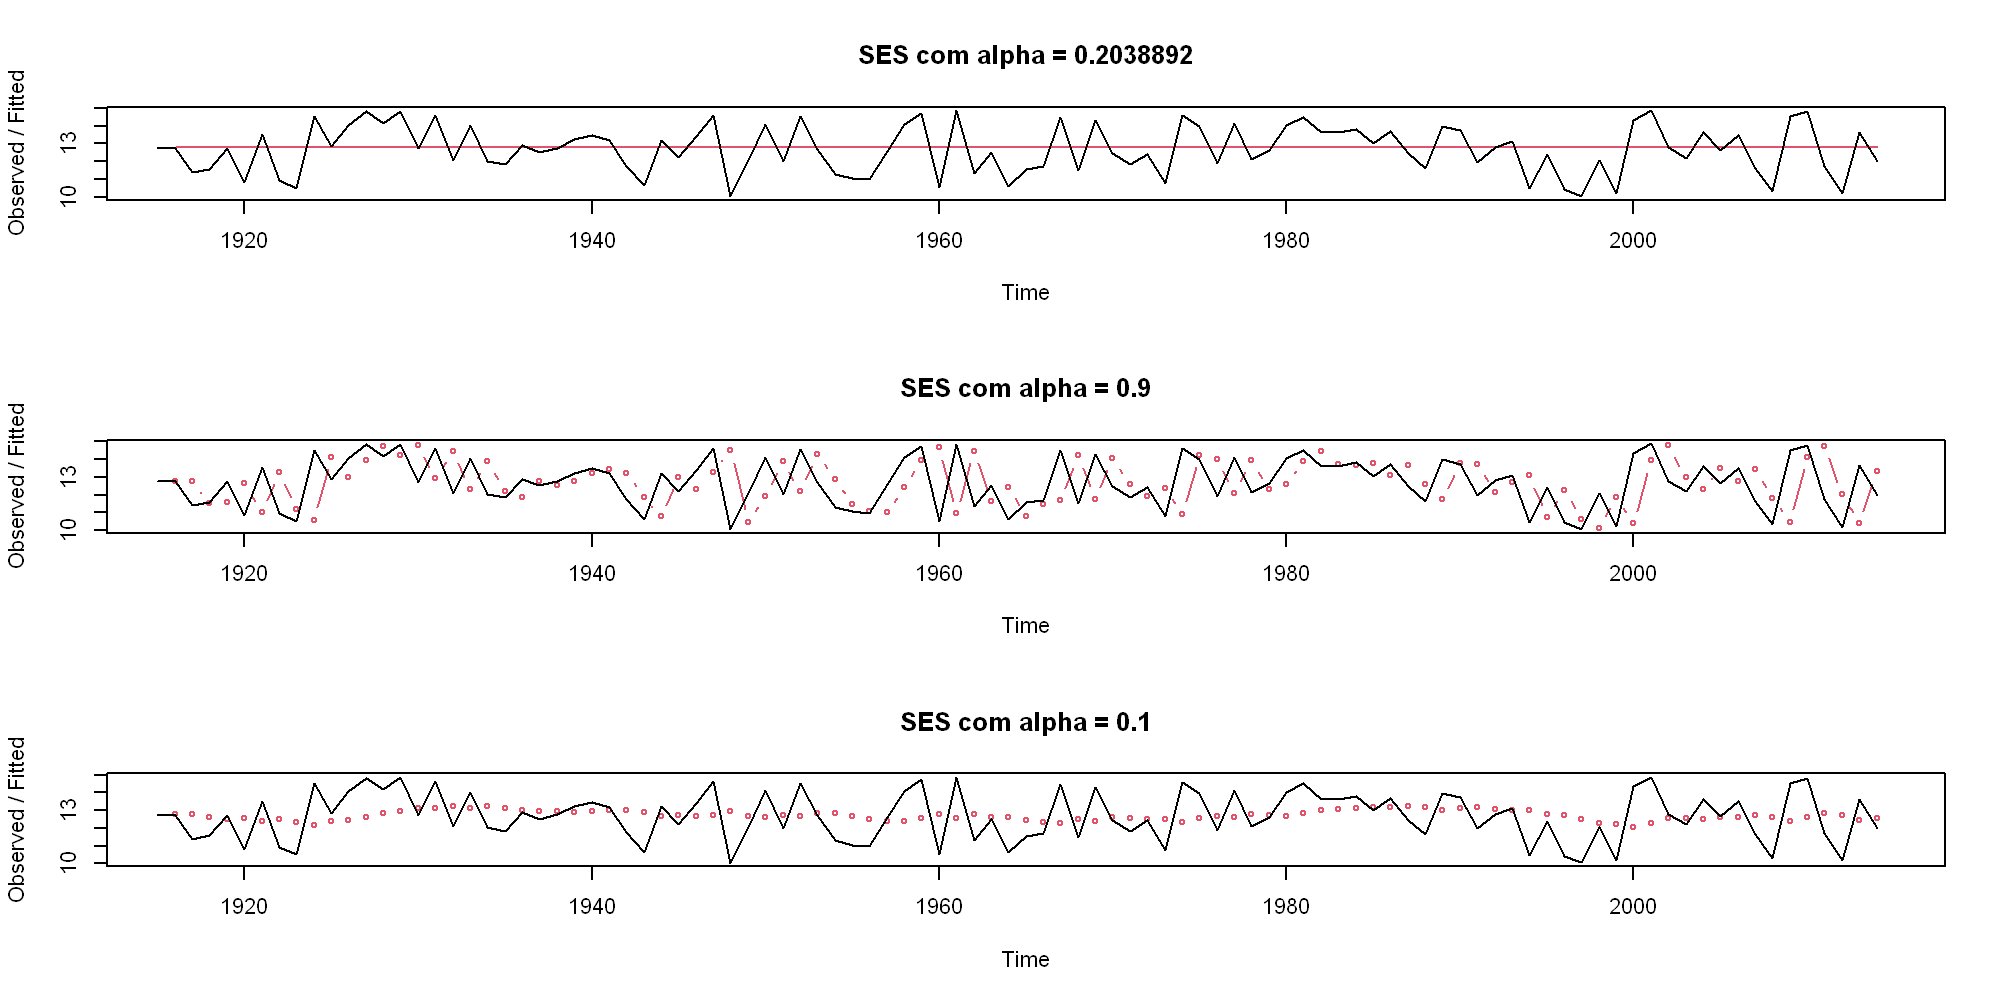

In [15]:
par(bg = 'white', mfrow = c(3, 1))
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 200)
plot(ajuste, main = "SES com alpha = 0.2038892")
plot(ajuste_09, type = 'b', main = "SES com alpha = 0.9")
plot(ajuste_01, type = 'b', main = "SES com alpha = 0.1")

> Tambem quando mais proximo de 1 mais ajustado a serie real fica

In [16]:
prev = forecast(ajuste, h=1)

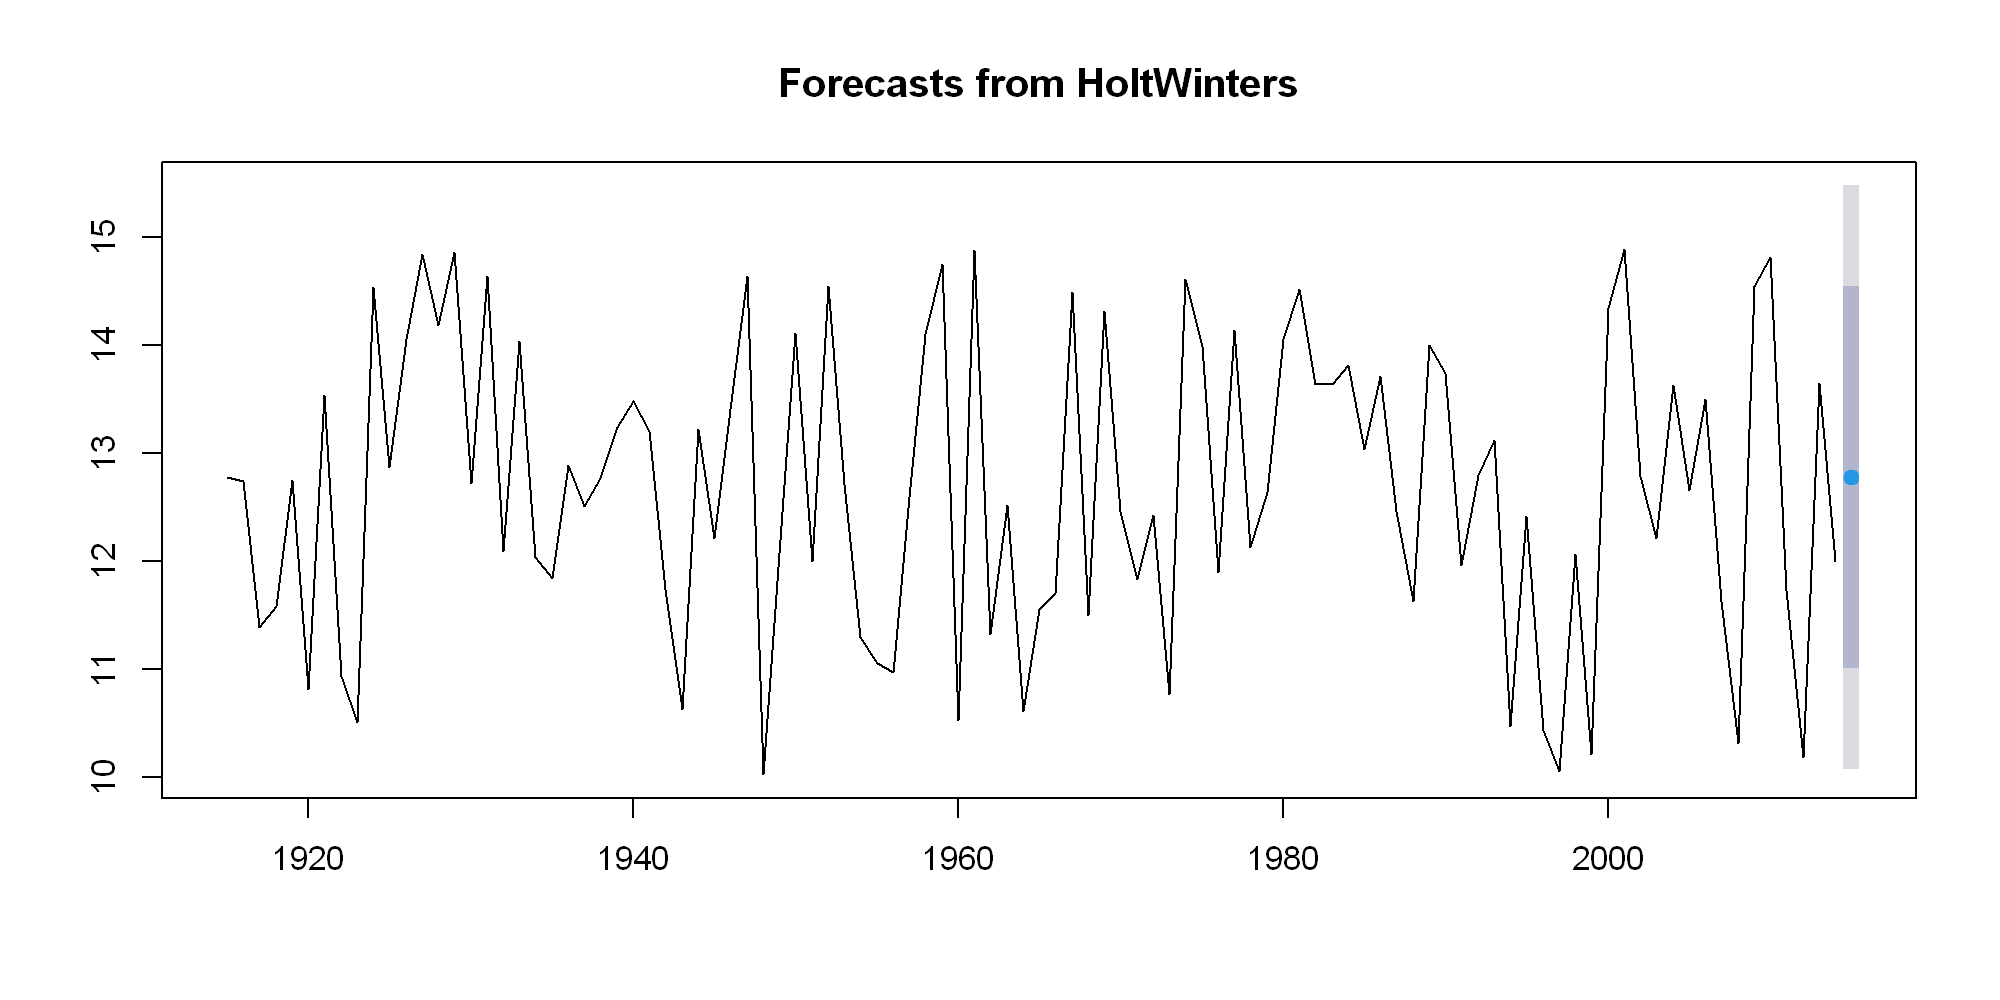

In [17]:
par(bg = 'white', mfrow = c(1, 1))
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 200)
plot(prev)

#### Suavização Holt

#### Suavização Holt-winter

&nbsp;

-------------

### Observação

Alem para criação de modelo suavização pode ser utilizada para tratamento de séries temporais

In [18]:
data = fread('dataset/bitcoin.csv')
serie = data[, close]

In [19]:
frequency(series)

[1] 1

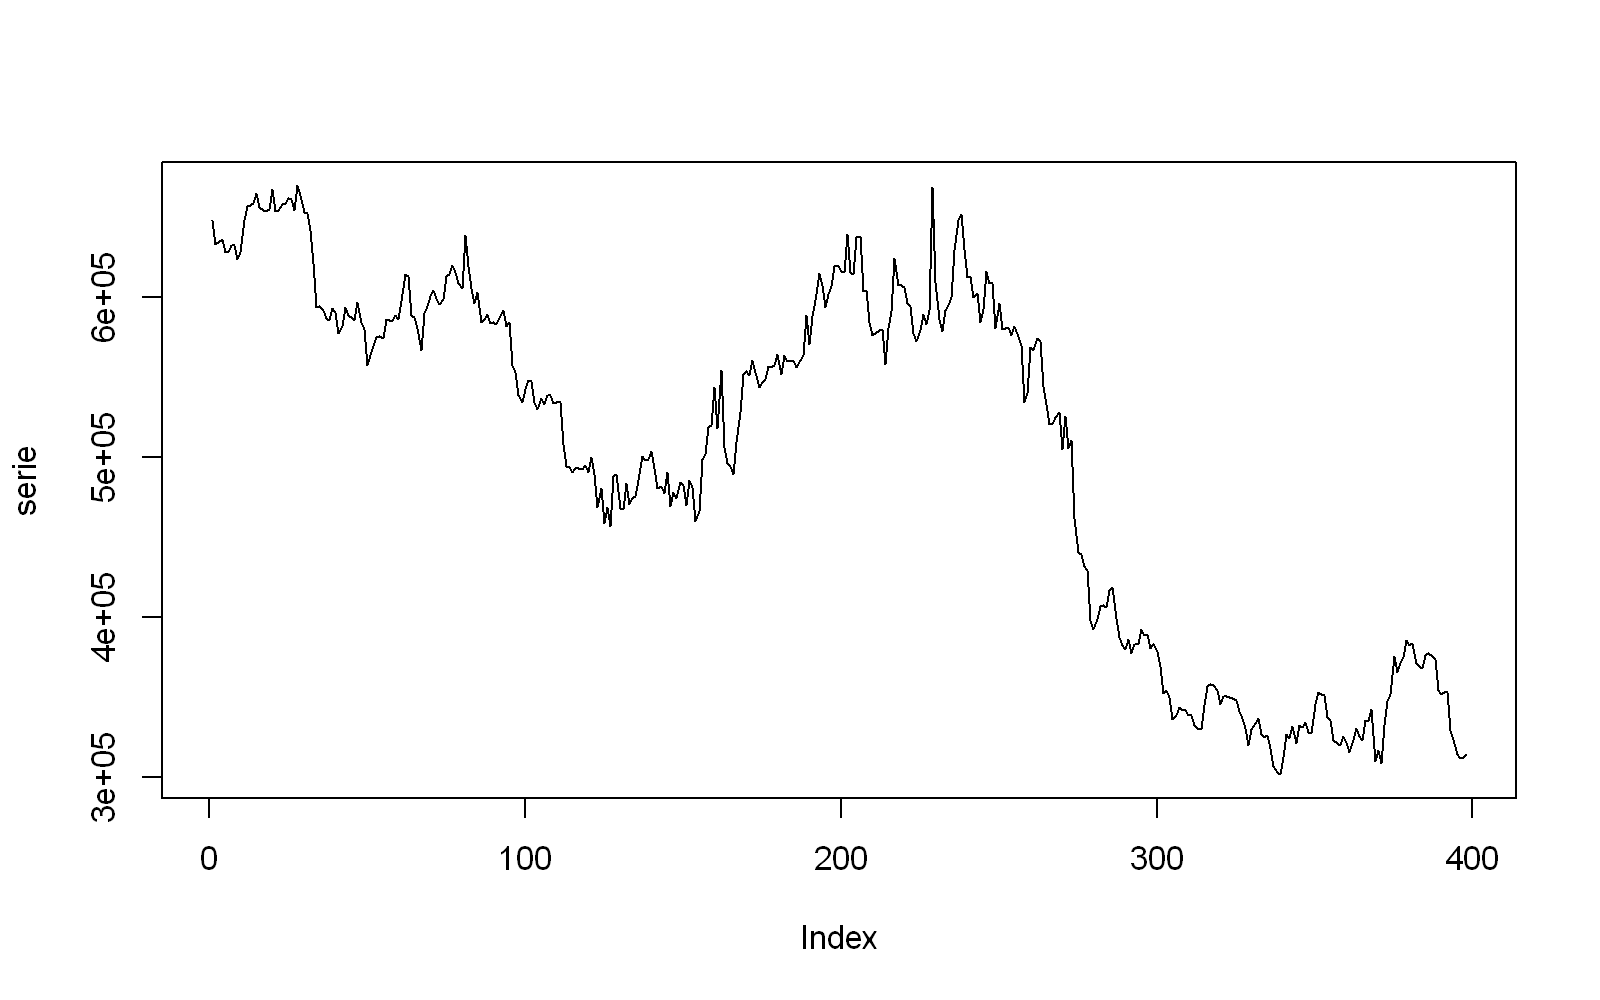

In [20]:
par(bg = 'white')
options(repr.plot.width = 8, repr.plot.height = 5, repr.plot.res = 200)
plot(serie, type = 'l')

In [21]:
ajuste = HoltWinters(serie, beta = TRUE, gamma = FALSE)
ajuste

Holt-Winters exponential smoothing with trend and without seasonal component.

Call:
HoltWinters(x = serie, beta = TRUE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.6308212
 beta : TRUE
 gamma: FALSE

Coefficients:
        [,1]
a 313060.260
b   3692.325

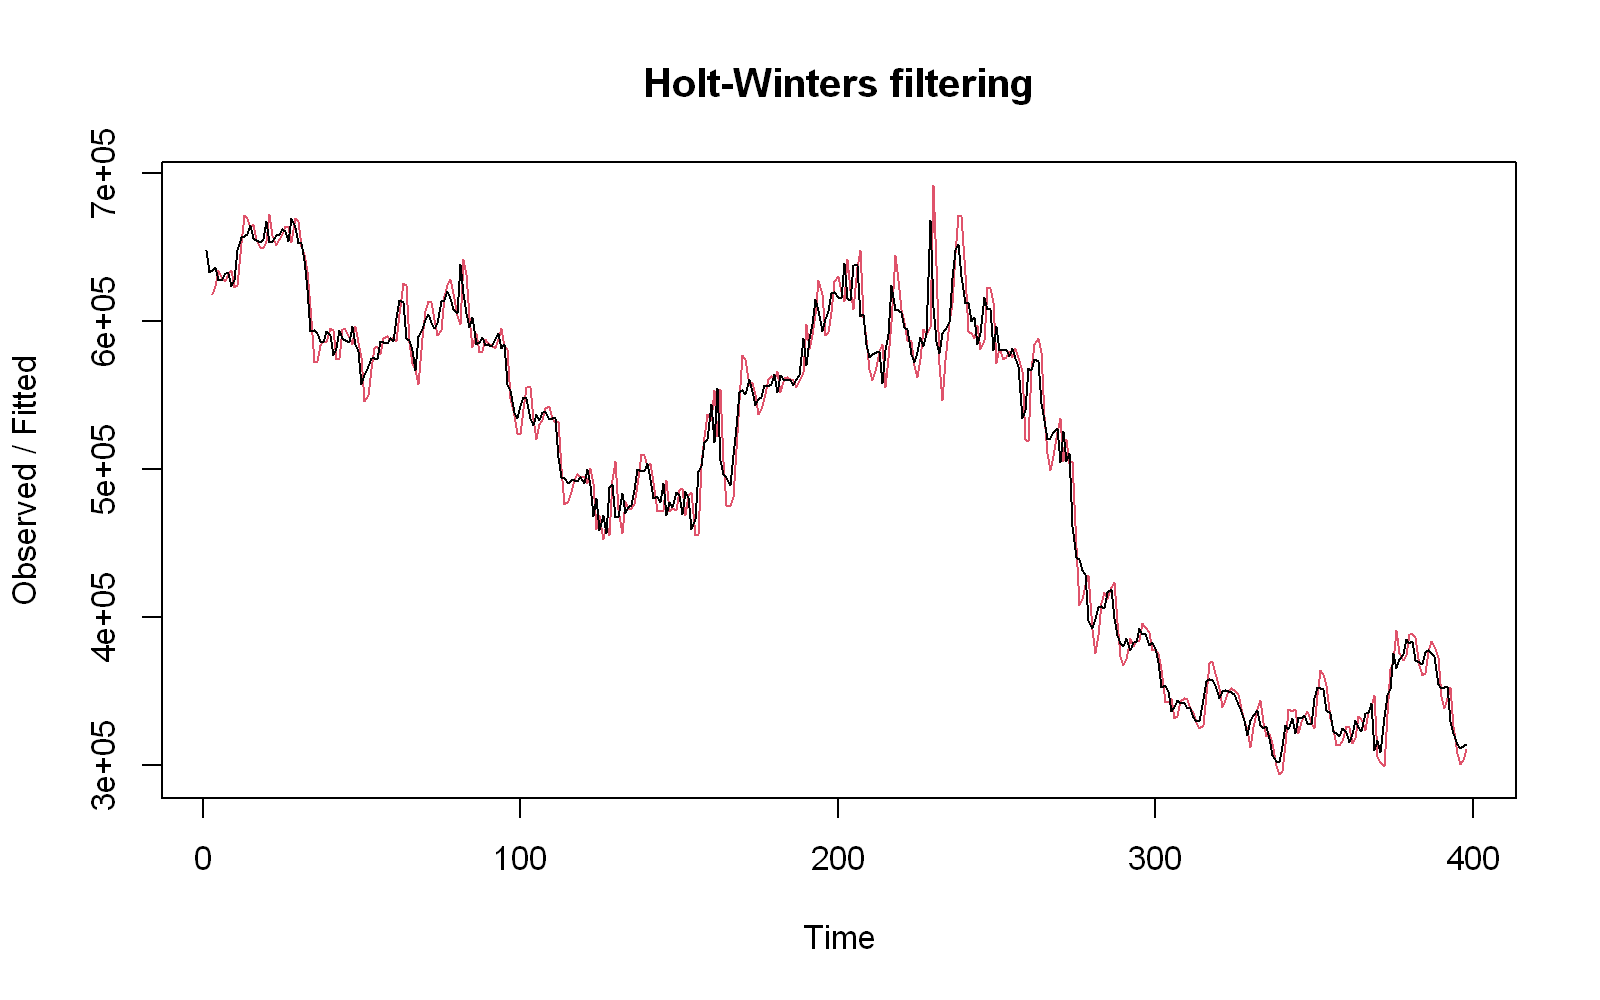

In [22]:
par(bg = 'white')
options(repr.plot.width = 8, repr.plot.height = 5, repr.plot.res = 200)
plot(ajuste)

In [23]:
prev = forecast(ajuste, h=10)

In [24]:
prev

    Point Forecast     Lo 80    Hi 80     Lo 95    Hi 95
399       316752.6 296471.23 337033.9 285734.93 347770.2
400       320444.9 287794.19 353095.6 270509.94 370379.9
401       324137.2 273746.50 374528.0 247071.26 401203.2
402       327829.6 256009.15 399650.0 217989.72 437669.4
403       331521.9 235343.54 427700.2 184429.81 478614.0
404       335214.2 212157.72 458270.7 147015.55 523412.9
405       338906.5 186711.20 491101.9 106143.86 571669.2
406       342598.9 159188.94 526008.8  62097.59 623100.1
407       346291.2 129732.62 562849.7  15093.45 677488.9
408       349983.5  98456.14 601510.9 -34694.40 734661.4

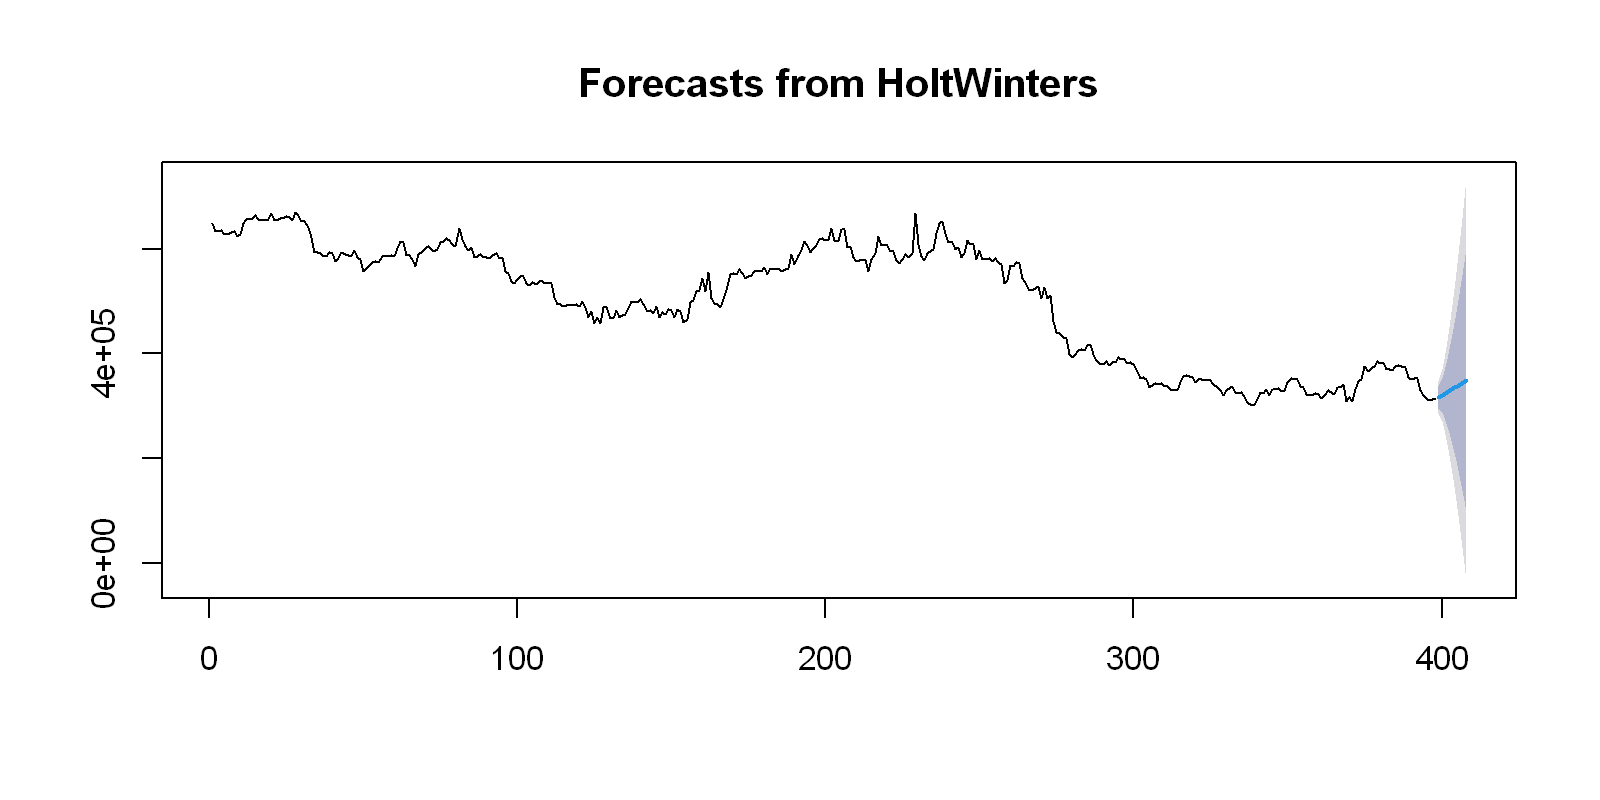

In [25]:
par(bg = 'white')
options(repr.plot.width = 8, repr.plot.height = 4, repr.plot.res = 200)
plot(prev)

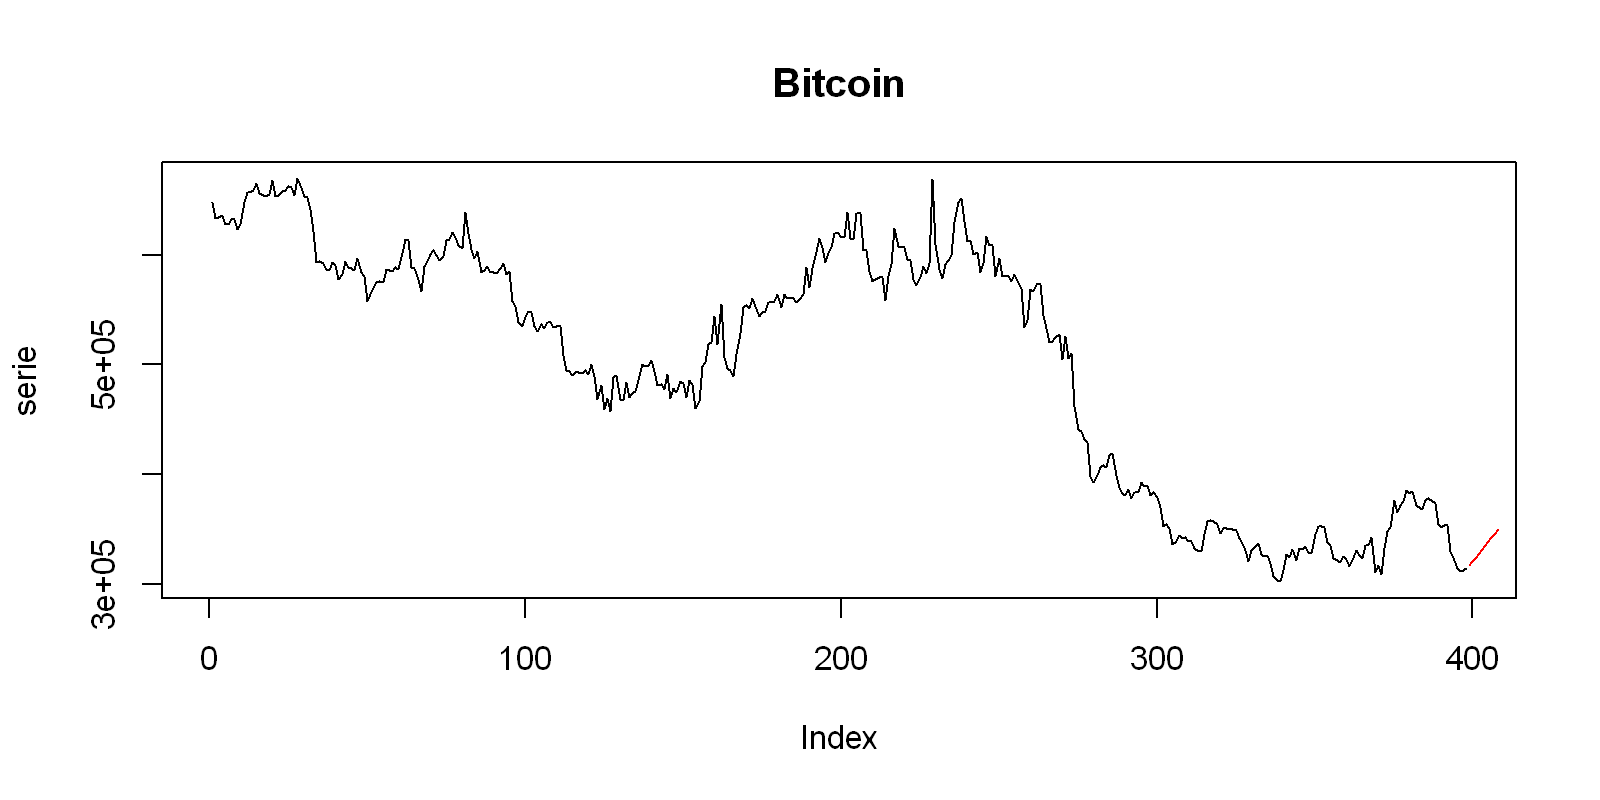

In [26]:
par(bg = 'white')
options(repr.plot.width = 8, repr.plot.height = 4, repr.plot.res = 200)
plot(serie, type = 'l', main = 'Bitcoin')
lines(prev$mean, col = 'red', main = 'Previsão Bitcoin')